<a href="https://colab.research.google.com/github/shuler7/DataMiningPublic/blob/main/SpaceTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opening the Data

In [24]:
import numpy as np
import pandas as pd

In [82]:
df = pd.read_csv("https://github.com/shuler7/DataMiningPublic/raw/main/spaceship_titanic_train.csv")
df_test= pd.read_csv("https://github.com/shuler7/DataMiningPublic/raw/main/spaceship_titanic_test.csv")

In [83]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [28]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

# Building a Decision Tree Classifier

This [link](https://www.datacamp.com/tutorial/decision-tree-classification-python) helped me make this.

In [36]:
# Split the data into features and targets
X = df[['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
Y = df['Transported']

In [37]:
# Build decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X,Y)

In [84]:
X_test = df_test[['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

# This test dataset is not labeled
# Y_test = df_test['Transported']

Y_pred = clf.predict(X_test)

In [58]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))


Accuracy: 0.8596571954446106


# Confusion Matrix

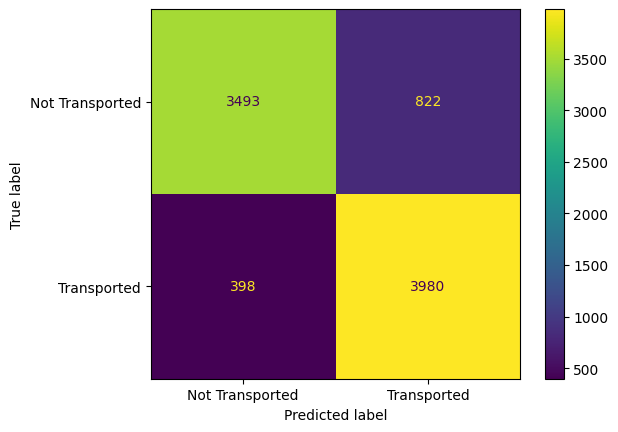

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix( Y_test, Y_pred)
ConfusionMatrixDisplay( cm, display_labels=["Not Transported", "Transported"]).plot()
tn, fp, fn, tp = cm.ravel()

In [63]:
# True Positive Rate Recall / Sensitivity : the proportion of the positives that were detected
# tp / (tp + fn)
recall = tp / df["Transported"].value_counts()[True]
recall

0.9090909090909091

In [67]:
# True Negative Rate : the proportion of the negatives that were detected
# tn / (tn + fp)
tn / (tn+fp)

0.8095017381228273

In [68]:
# Positive Predictive Value / Precision: Proportion that
# we said got transported truly got transported
# tp / (tp + fp)

precision = tp / (tp+fp)
precision

0.8288213244481466

In [69]:
# Negative Predictive Value : Proportion that
# we said NOT transported were NOT transported
# tn / (tn + fn)

tn / (tn+fn)

0.8977126702647135

In [70]:
# Accuracy: Proportion of predictions that were correct.
(tp + tn)/(tp + tn + fp + fn)

0.8596571954446106

In [71]:
# F1 score
# 2*(recall)*(precision) / (recall + precision)
2*(recall)*(precision) / (recall + precision)

0.8671023965141611

# Decision Tree Visualization

In [72]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [74]:
from sklearn.tree import export_graphviz

export_graphviz(
        clf,
        out_file=str(IMAGES_PATH / "Space_Decision.dot"),
        feature_names=['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
        class_names=df['Transported'].unique().astype(str),
        rounded=True,
        filled=True
    )

In [ ]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "Space_Decision.dot")  # path differs in the book

In [ ]:
# extra code
!dot -Tpng {IMAGES_PATH / "Space_Decision.dot"} -o {IMAGES_PATH / "Space_Decision.png"}

# Turning Prediction into CSV

In [75]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [86]:
submission = pd.DataFrame( {
    'PassengerId': df_test['PassengerId'],
    'Transported': Y_pred
})

In [87]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [89]:
from google.colab import drive
drive.mount('/content/drive')

submission.to_csv('/content/drive/My Drive/SpaceTitanicSubmission.csv', index=False)

Mounted at /content/drive
